<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1">Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1">Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2">Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Стиль-заголовков" data-toc-modified-id="Стиль-заголовков-2.1">Стиль заголовков</a></span></li><li><span><a href="#Пропуски-значений" data-toc-modified-id="Пропуски-значений-2.2">Пропуски значений</a></span></li><li><span><a href="#Замена-типа-данных" data-toc-modified-id="Замена-типа-данных-2.3">Замена типа данных</a></span></li><li><span><a href="#Изменение-единиц-измерения-данных" data-toc-modified-id="Изменение-единиц-измерения-данных-2.4">Изменение единиц измерения данных</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3">Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Новые-столбцы" data-toc-modified-id="Новые-столбцы-3.1">Новые столбцы</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4">Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Площадь,-цена,-число-комнат,-высота-потолков" data-toc-modified-id="Площадь,-цена,-число-комнат,-высота-потолков-4.1">Площадь, цена, число комнат, высота потолков</a></span></li><li><span><a href="#Время-продажи-квартиры" data-toc-modified-id="Время-продажи-квартиры-4.2">Время продажи квартиры</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.3">Вывод</a></span></li><li><span><a href="#Влияние--факторов-на-стоимость-квартиры" data-toc-modified-id="Влияние--факторов-на-стоимость-квартиры-4.4">Влияние  факторов на стоимость квартиры</a></span></li><li><span><a href="#Анализ-объявлений-по-населённым-пунктам" data-toc-modified-id="Анализ-объявлений-по-населённым-пунктам-4.5">Анализ объявлений по населённым пунктам</a></span></li><li><span><a href="#Удаленность-от-центра-для-Санкт-Петербурга" data-toc-modified-id="Удаленность-от-центра-для-Санкт-Петербурга-4.6">Удаленность от центра для Санкт-Петербурга</a></span></li><li><span><a href="#Анализ-центра-для-Санкт-Петербурга" data-toc-modified-id="Анализ-центра-для-Санкт-Петербурга-4.7">Анализ центра для Санкт-Петербурга</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5">Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6">Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
# импорт библиотеки pandas и matplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# чтение файла с данными и сохранение в data
try: data = pd.read_csv('real_estate_data.csv', sep = '	') 
except: data = pd.read_csv('/datasets/real_estate_data.csv', sep = '	')
# получение общей информации о данных в таблице data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [4]:
# посмотрим как выглядят данные
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
# проверим названия колонок
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

### Вывод


В таблице **22 столбца** и **23699 строк**


**В таблице следующие столбцы (по алфавиту):**

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

Нужно изучить и заполнить пропуски в **ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition**.
Поправить название столбца **cityCenters_nearest**.

Данные в **balcony, parks_around3000, ponds_around3000, days_exposition, floors_total, total_images, rooms, floor** можно перевести из float64 в int64. 
**is_apartment** можно преобразовать в bool.
Перевести метры в километры в **airports_nearest, city_centers_nearest, parks_nearest, ponds_nearest**.


## Предобработка данных

### Стиль заголовков

In [6]:
# поправим название столбца cityCenters_nearest
data=data.rename(columns={'cityCenters_nearest':'city_centers_nearest'})
# проверим название столбца
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

### Пропуски значений

In [7]:
# заполиним пропуски в столбцах balcony, parks_around3000, ponds_around3000 и проверим остались ли пропуски
columns_to_fillna = ['balcony', 'parks_around3000', 'ponds_around3000']

data[columns_to_fillna] = data[columns_to_fillna].fillna(value = 0)
data[columns_to_fillna].isna().sum()

balcony             0
parks_around3000    0
ponds_around3000    0
dtype: int64

In [8]:
# в столбце days_exposition посмотрим описание
# есть пропуски, но заполнять средним или медианным значением пока не будем, так как получаются большие выбросы 

data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [9]:
# узнаем сколько пропусков в floors_total
data['floors_total'].isna().sum()

86

In [10]:
# посмотрим какие значения в floors_total
data['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

In [11]:
# учитывая малое количество, удалим строки с пропусками
data.dropna(subset = ['floors_total'], inplace = True)
data = data.reset_index(drop=True)

In [12]:
# проверим сколько пропусков в is_apartment
data['is_apartment'].isna().sum()

20838

In [13]:
# заполним пропуски для булевого столбца is_apartment значением False
data['is_apartment'] = data['is_apartment'].fillna('False')

In [14]:
# посмотрим уникальные значения locality_name
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [15]:
#заполним пропуски на Другое
data['locality_name'] = data['locality_name'].fillna('Другое')

In [16]:
# сделаем цикл, который заполняет пропуски расстояний исходя из групп по locality name 
# в airports_nearest, city_centers_nearest, parks_nearest, ponds_nearest
# и оценим оставшиеся пропуски
nearest_list = ['airports_nearest', 'city_centers_nearest', 'parks_nearest', 'ponds_nearest']
na_nearest = []
for col in nearest_list:
    data[col] = data[col].fillna(data.groupby('locality_name')[col].transform('mean'))
    na_nearest.append(data[col].isna().sum())
na_nearest 

[5432, 5432, 5986, 5517]

In [18]:
# проверим сколько пропусков в kitchen_area
data['kitchen_area'].isna().sum()

2231

In [19]:
# проверим сколько пропусков в living_area
data['living_area'].isna().sum()

1870

In [20]:
# рассчитаем коэффициент для living_area
living_coef = (data['total_area']/data['living_area']).mean()
living_coef

1.8457113357130028

In [21]:
# рассчитаем коэффициент для kitchen_area
kitchen_coef = ((data['total_area']-data['living_area'])/data['kitchen_area']).mean()
kitchen_coef

2.5244633287359504

In [22]:
# заполним пропуски и проверим пропуски в living_area
data['living_area'] = data['living_area'].fillna(data['total_area']/living_coef)
data['living_area'].isna().sum()

0

In [23]:
# заполним пропуски и проверим пропуски в kitchen_area 
data['kitchen_area'] = data['kitchen_area'].fillna(((data['total_area']-data['living_area'])/kitchen_coef))
data['kitchen_area'].isna().sum()

0

In [24]:
data.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.104940,0.116425,0.099385,-0.001973,0.010427,0.104459,0.033286,-0.028116,-0.024607,0.107351,0.047212,-0.002650,-0.048076,0.037357,-0.002505,0.012057,-0.004308,-0.026578
last_price,0.104940,1.000000,0.653581,0.363124,0.085435,-0.006984,0.584886,0.026644,-0.025083,-0.008801,0.504754,0.008598,-0.026051,-0.205725,0.198419,-0.012976,0.209058,-0.082021,0.081063
total_area,0.116425,0.653581,1.000000,0.758324,0.095506,-0.075774,0.944935,-0.024927,-0.071983,-0.034941,0.656997,0.010104,-0.029967,-0.230279,0.201414,-0.015548,0.201049,-0.082542,0.150130
rooms,0.099385,0.363124,0.758324,1.000000,0.054512,-0.228215,0.828805,-0.151586,-0.145983,-0.087687,0.321335,-0.015759,-0.061034,-0.184653,0.158375,-0.038819,0.121846,-0.048495,0.127470
ceiling_height,-0.001973,0.085435,0.095506,0.054512,1.000000,-0.028732,0.093822,-0.011806,0.001674,0.042777,0.082411,0.031229,-0.024007,-0.091784,0.062242,-0.017584,0.072351,-0.052858,0.019092
floors_total,0.010427,-0.006984,-0.075774,-0.228215,-0.028732,1.000000,-0.160298,0.678059,0.070151,0.050791,0.120509,0.172812,0.107639,0.019445,-0.158775,0.070806,-0.048698,0.043637,-0.052234
living_area,0.104459,0.584886,0.944935,0.828805,0.093822,-0.160298,1.000000,-0.089765,-0.055676,-0.025257,0.489058,-0.009189,-0.051538,-0.228501,0.210341,-0.038044,0.184246,-0.071612,0.145409
floor,0.033286,0.026644,-0.024927,-0.151586,-0.011806,0.678059,-0.089765,1.000000,0.035908,0.036140,0.106149,0.171005,0.072329,0.008855,-0.105279,0.051167,-0.029510,0.029177,-0.039018
studio,-0.028116,-0.025083,-0.071983,-0.145983,0.001674,0.070151,-0.055676,0.035908,1.000000,-0.004208,-0.089530,0.030050,-0.022273,-0.005832,-0.032081,0.004729,-0.009291,0.002248,-0.021604
open_plan,-0.024607,-0.008801,-0.034941,-0.087687,0.042777,0.050791,-0.025257,0.036140,-0.004208,1.000000,-0.046605,0.032554,-0.013574,-0.004166,-0.016392,0.006635,-0.004107,-0.002502,-0.024161


In [25]:
# проверим пропуски в ceiling_height
data['ceiling_height'].isna().sum()

9118

In [26]:
# посмотрим описание ceiling_height
data['ceiling_height'].describe()

count    14495.000000
mean         2.771495
std          1.261445
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [27]:
# перезапишем значения для потолков меньше 2.5 м и больше 4 м
data.loc[((data['ceiling_height'] > 4) | (data['ceiling_height'] < 2.5)), 'ceiling_height'] = data['ceiling_height'].median()


In [28]:
# проверим как изменилось описание ceiling_height
data['ceiling_height'].describe()

count    14495.000000
mean         2.722026
std          0.256068
min          2.500000
25%          2.520000
50%          2.650000
75%          2.800000
max          4.000000
Name: ceiling_height, dtype: float64

In [29]:
# заполним пропуски и проверим пропуски в ceiling_height
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].mean())
data['ceiling_height'].isna().sum()

0

### Замена типа данных

In [30]:

data.astype({'balcony': 'int', 
             'parks_around3000': 'int', 
             'ponds_around3000': 'int', 
             'floors_total': 'int', 
             'total_images': 'int', 
             'rooms': 'int', 
             'floor': 'int',
             'is_apartment': 'bool'
})
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23613 entries, 0 to 23612
Data columns (total 22 columns):
total_images            23613 non-null int64
last_price              23613 non-null float64
total_area              23613 non-null float64
first_day_exposition    23613 non-null object
rooms                   23613 non-null int64
ceiling_height          23613 non-null float64
floors_total            23613 non-null float64
living_area             23613 non-null float64
floor                   23613 non-null int64
is_apartment            23613 non-null object
studio                  23613 non-null bool
open_plan               23613 non-null bool
kitchen_area            23613 non-null float64
balcony                 23613 non-null float64
locality_name           23613 non-null object
airports_nearest        18181 non-null float64
city_centers_nearest    18181 non-null float64
parks_around3000        23613 non-null float64
parks_nearest           17627 non-null float64
ponds_around3

### Изменение единиц измерения данных

In [33]:
# переведем в км и проверим
nearest_list = ['airports_nearest', 'city_centers_nearest', 'parks_nearest', 'ponds_nearest']
for col in nearest_list:
    data[col] = data[col]/1000


In [34]:
# переведем в млн 
data['last_price'] = data['last_price']/1000000

In [35]:
# проверим изменения
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13.000,108.0,2019-03-07T00:00:00,3,2.700000,16.0,51.000000,8,False,...,25.000000,0.0,Санкт-Петербург,18.863,16.028,1.0,0.482,2.0,0.755000,NaN
1,7,3.350,40.4,2018-12-04T00:00:00,1,2.722026,11.0,18.600000,1,False,...,11.000000,2.0,посёлок Шушары,12.817,18.603,0.0,NaN,0.0,0.573217,81.0
2,10,5.196,56.0,2015-08-20T00:00:00,2,2.722026,5.0,34.300000,4,False,...,8.300000,0.0,Санкт-Петербург,21.741,13.933,1.0,0.090,2.0,0.574000,558.0
3,0,64.900,159.0,2015-07-24T00:00:00,3,2.722026,14.0,86.145649,9,False,...,28.859342,0.0,Санкт-Петербург,28.098,6.800,2.0,0.084,3.0,0.234000,424.0
4,2,10.000,100.0,2018-06-19T00:00:00,2,3.030000,14.0,32.000000,13,False,...,41.000000,0.0,Санкт-Петербург,31.856,8.098,2.0,0.112,1.0,0.048000,121.0


## Расчёты и добавление результатов в таблицу

### Новые столбцы

Добавим столбцы с ценой квадратного метра;
денем недели, месяцем и годом публикации объявления;
категорией этажа квартиры;
соотношения жилой и общей площади, а также отношение площади кухни к общей.

In [36]:
#создадим столбец с ценой квадратного метра
data['price_metr'] = round(((data['last_price']/data['total_area'])*1000), 2)


In [37]:
#создадим столбцы с днем недели, месяцем и годом публикации объявления
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['day_name'] = data['first_day_exposition'].dt.day_name()
data['day_week'] = data['first_day_exposition'].dt.weekday

In [38]:
# функция для нового с столбца с категормями этажей 
def floor(row):
    floor_number = row['floor']
    floors_total = row['floors_total']
    if floor_number == floors_total:
         return 'последний'
    if floor_number == 1:
        return 'первый'
    return 'другой'

data['floor_cat'] = data.apply(floor, axis=1)
# проверим категории
data['floor_cat'].value_counts()

другой       17363
последний     3361
первый        2889
Name: floor_cat, dtype: int64

In [39]:
# создадим столбцы с соотношеним жилой и общей площади, а также площади кухни к общей
data['total_living_ratio'] = data['living_area']/data['total_area']
data['total_kitchen_ratio'] = data['kitchen_area']/data['total_area']

In [40]:
# проверим новые столбцы
data.loc[:, ['last_price', 'total_area', 'price_metr', 'floor', 'floor_cat', 'floors_total', 'living_area', 'total_living_ratio', 'kitchen_area',  'total_kitchen_ratio', 'first_day_exposition', 'year', 'month', 'day_week']].head()



,last_price,total_area,price_metr,floor,floor_cat,floors_total,living_area,total_living_ratio,kitchen_area,total_kitchen_ratio,first_day_exposition,year,month,day_week
0,13.000,108.0,120.37,8,другой,16.0,51.000000,0.472222,25.000000,0.231481,2019-03-07,2019,3,3
1,3.350,40.4,82.92,1,первый,11.0,18.600000,0.460396,11.000000,0.272277,2018-12-04,2018,12,1
2,5.196,56.0,92.79,4,другой,5.0,34.300000,0.612500,8.300000,0.148214,2015-08-20,2015,8,3
3,64.900,159.0,408.18,9,другой,14.0,86.145649,0.541797,28.859342,0.181505,2015-07-24,2015,7,4
4,10.000,100.0,100.00,13,другой,14.0,32.000000,0.320000,41.000000,0.410000,2018-06-19,2018,6,1


## Исследовательский анализ данных

### Площадь, цена, число комнат, высота потолков

Изучим данные по площади, цене, числу комнат и высоте потолков. 
Для этого построим гистограммы для каждого параметра и вычеслим показатели разброса данных.

count    23613.000000
mean        60.340678
std         35.648988
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

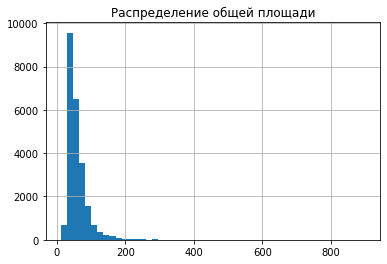

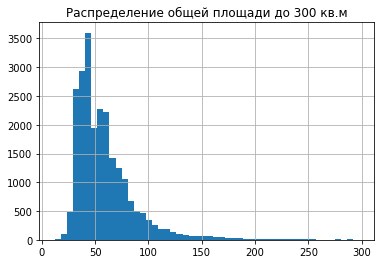

In [41]:
# построим гистограмму для total_area и вычеслим показатели разброса данных
display(data['total_area'].describe())
data['total_area'].hist(bins = 50)
plt.title('Распределение общей площади')
plt.show()

data['total_area'].where(data['total_area'] < 300).hist(bins = 50)
plt.title('Распределение общей площади до 300 кв.м')
plt.show()


count    23613.000000
mean         6.540555
std         10.901723
min          0.012190
25%          3.400000
50%          4.650000
75%          6.799000
max        763.000000
Name: last_price, dtype: float64

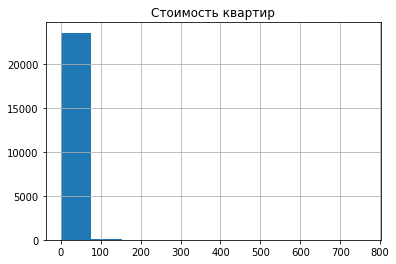

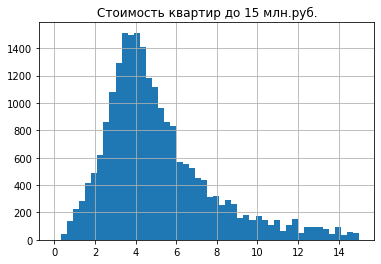

In [42]:
# построим гистограмму для last_price и вычеслим показатели разброса данных
display(data['last_price'].describe())
data['last_price'].hist()
plt.title('Стоимость квартир')
plt.show()

data['last_price'].where(data['last_price'] < 15).hist(bins = 50)
plt.title('Стоимость квартир до 15 млн.руб.')
plt.show()

count    23613.000000
mean         2.071147
std          1.078380
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

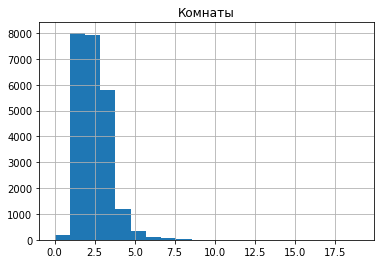

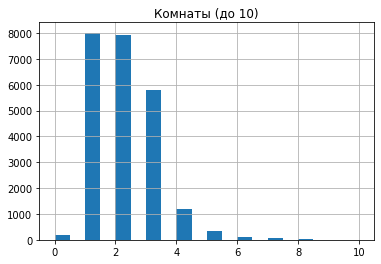

In [43]:
# построим гистограмму для rooms и вычеслим показатели разброса данных
display(data['rooms'].describe())
data['rooms'].hist(bins = 20)
plt.title('Комнаты')
plt.show()

data['rooms'].where(data['rooms'] <= 10).hist(bins = 20)
plt.title('Комнаты (до 10)')
plt.show()


count    23613.000000
mean         2.722026
std          0.200624
min          2.500000
25%          2.600000
50%          2.722026
75%          2.722026
max          4.000000
Name: ceiling_height, dtype: float64

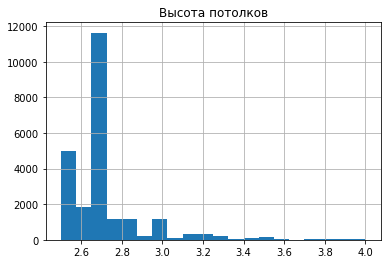

In [44]:
# построим гистограмму для ceiling_height и вычеслим показатели разброса данных
display(data['ceiling_height'].describe())
data['ceiling_height'].hist(bins = 20)
plt.title('Высота потолков')
plt.show()

### Время продажи квартиры
Изучим время продажи квартиры. Для этого построим гистограмму и посчитаим среднее и медиану.

count    20441.000000
mean       180.884839
std        219.685543
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

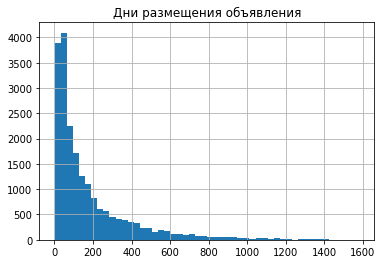

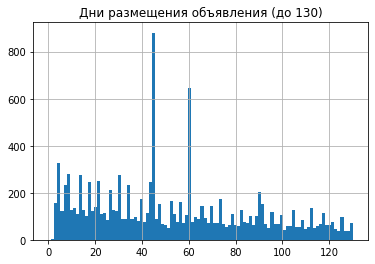

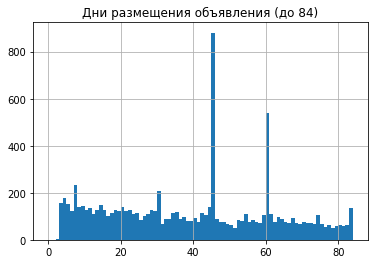

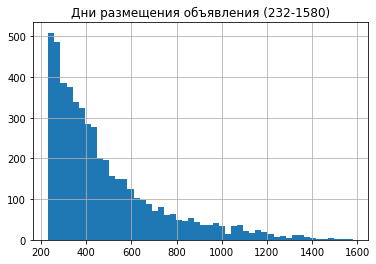

In [45]:
# построим гистограмму для days_exposition и вычеслим показатели разброса данных
display(data['days_exposition'].describe())
data['days_exposition'].hist(bins = 50)
plt.title('Дни размещения объявления')
plt.show()
# рассмотрим отдельные участки гистограмм
data['days_exposition'].hist(bins = 100, range = (0, 130))
plt.title('Дни размещения объявления (до 130)')
plt.show()

data['days_exposition'].hist(bins = 84, range = (0, 84))
plt.title('Дни размещения объявления (до 84)')
plt.show()

data['days_exposition'].hist(bins = 50, range = (232, 1580))
plt.title('Дни размещения объявления (232-1580)')
plt.show()

In [46]:
#Уберите редкие и выбивающиеся значения

# предположение, что если бы объявления не снимались бы автоматически, 
# то могли бы еще быть опубликованы некоторое время
# но возможно, также, что эти объявления не актульны уже
# в этой работе для выбивающихся значений напишем цикл по заполнению случайными данными в диапазоне медианы

from random import randint
for i in data.query('days_exposition in (30, 45, 60, 90)').index:
    data.loc[i, 'days_exposition'] = data.loc[i, 'days_exposition'] + randint(1, 95)
    

In [47]:
data['days_exposition'].describe()


count    20441.000000
mean       182.683968
std        218.884763
min          1.000000
25%         45.000000
50%        102.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

### Вывод
Из полученного описания данных по времени продаж и гистограммам можно сказать, что :
- среднее значение равно 180 дн., медианное - 95 дн. Значит, перед нами не нормальное распределение и для оценки лучше использовать медианное значение. 
- Время продажи варьируется от 1 дня до 1580. Обычно на продажу квартиры нужно около 100 дней (судя по первой гистограмме - максимальное количество продаж находится примерно в этом значении). Судя по разбивке на квартили очень быстрые продажи проходят в срок до 45 дней, а очень длительные после 232 дней.
- В целом распределение напоминает пуассоновское. Но есть явные выбросы: на 30, 45, 60 и 90 дней. Вероятно объявления снимаются автоматически в эти дни. Нужно их обработать. Если совсем убрать эти значения, то можно потерять реальные продажи. В данной работе увеличим их значение на случайное число. 

### Влияние  факторов на стоимость квартиры

- **Влияние площади, числа комнат, удалённости от центра**

коэффициент корреляции между стоимостью квартиры и total_area


0.65

коэффициент корреляции между стоимостью квартиры и rooms


0.36

коэффициент корреляции между стоимостью квартиры и city_centers_nearest


-0.21

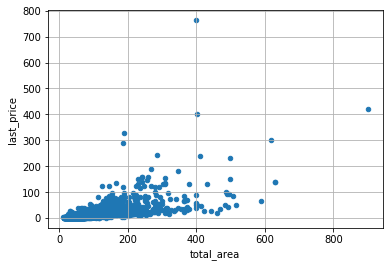

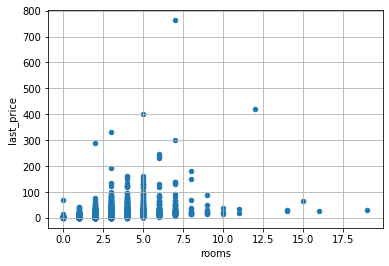

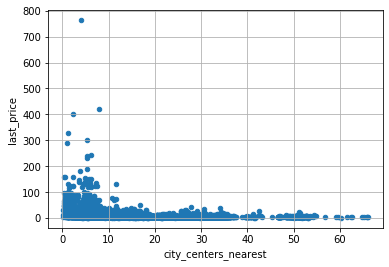

In [48]:
# посмотрим корреляции между этими величинами и построим диаграмму рассеяния
corr_list1 = ['total_area', 'rooms', 'city_centers_nearest']
corr_numbers1 = []
for col in corr_list1:
    print(f'коэффициент корреляции между стоимостью квартиры и {col}')
    display (round(data['last_price'].corr(data[col]), 2))
    corr_numbers1.append(data['last_price'].corr(data[col]))
    data.plot(x = col, y = 'last_price', kind = 'scatter', grid=True)


Среди данных параметров наиболее явная взаимосвязь стоимости квартиры видна с площадью, коэффициент корреляции 0,65. Число комнат и удалённость от центра не имеют такую же взаимосвязь. Кроме того, можно отметить, что с удалённостью от центра связь обратная. 

 - **Влияние этажа**

'корреляция между ценой и категормями этажей'

0.057

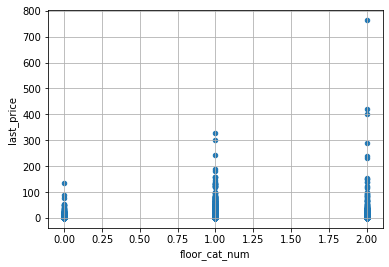

In [49]:
# посмотрим корреляцию между этими величинами и построим диаграмму рассеяния
# функция для нового с столбца с числовыми категормями этажей 
def floor_cat(floor_cat):
    if floor_cat == 'последний':
         return 2
    if floor_cat == 'первый':
        return 0
    return 1

data['floor_cat_num'] = data['floor_cat'].apply(floor_cat)

# проверим категории
corr_numbers2 = []
display('корреляция между ценой и категормями этажей')
display((round(data['last_price'].corr(data['floor_cat_num']), 3)))
corr_numbers2.append(data['last_price'].corr(data['floor_cat_num']))
data.plot(x = 'floor_cat_num', y = 'last_price', kind = 'scatter', grid=True)


'корреляция между ценой и этажом'

0.03

'корреляция между ценой за кв.м и этажом'

0.13

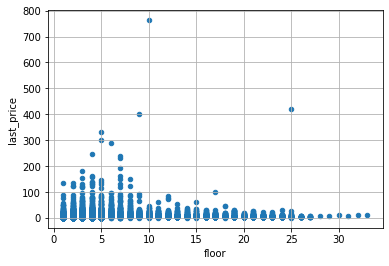

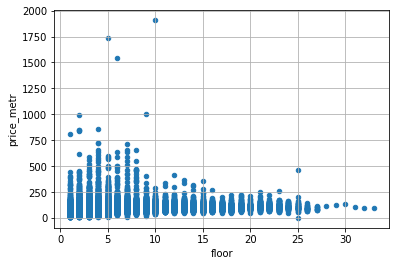

In [50]:

display('корреляция между ценой и этажом')
display(round(data['last_price'].corr(data['floor']), 2))
corr_numbers2.append(data['last_price'].corr(data['floor']))
data.plot(x = 'floor', y = 'last_price', kind = 'scatter', grid=True)


display('корреляция между ценой за кв.м и этажом')
display(round(data['price_metr'].corr(data['floor']), 2))
corr_numbers2.append(data['price_metr'].corr(data['floor']))
data.plot(x = 'floor', y = 'price_metr', kind = 'scatter', grid=True)



In [51]:
data.pivot_table(index = ['floor'], values = ('price_metr', 'last_price'), aggfunc = ('median', 'mean'))

last_price            price_metr         
            mean    median        mean   median
floor                                          
1       4.805699   3.90000   81.995944   81.235
2       6.162681   4.49000   94.384688   90.730
3       6.725367   4.60000   97.682916   93.460
4       7.133279   4.70000   99.613518   93.125
5       6.618781   4.40000   96.113454   90.700
6       7.528837   5.10000  109.508032   99.345
7       7.922230   4.95000  109.403130  100.000
8       6.822020   4.80000  107.186763  100.080
9       6.318548   4.67000  103.924025   97.985
10      7.679125   5.04850  110.511623  104.470
11      6.504624   5.18000  108.824077  104.865
12      6.704007   5.17000  108.904577  102.565
13      6.430622   5.31000  110.719495  106.565
14      6.223648   5.03500  108.851910  103.750
15      6.457827   5.05000  109.544294  105.095
16      6.270367   5.20014  108.951365  105.990
17      6.435916   4.90000  107.607124  105.080
18      6.399231   5.40000  104.883771  103.850
19      7.462815   5.04250  112.184167  106.255
20      6.164182   4.97000  109.863889  104.810
21      6.687592   5.20000  113.291157  108.040
22      6.102772   5.27450  110.512946  105.250
23      5.937647   5.17000  111.891616  107.540
24      6.416725   5.15000  109.784426  105.100
25     15.118186   4.77500  113.323261  101.435
26      4.571042   4.04000   95.807083   91.180
27      4.765702   4.49400   92.477000   87.915
28      5.990000   5.99000  110.930000  110.930
29      9.200000   9.20000  122.670000  122.670
30     10.150000  10.15000  137.160000  137.160
31      5.700000   5.70000  105.560000  105.560
32      9.900000   9.90000   98.020000   98.020
33      9.900000   9.90000   98.020000   98.020

Text(0.5, 1.0, 'Price per metr and floors')

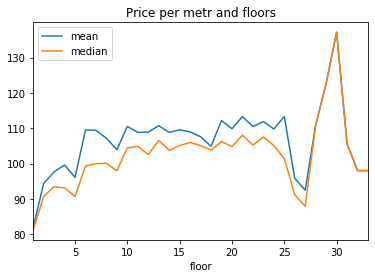

In [52]:
data.pivot_table(index = ['floor'], values = 'price_metr', aggfunc = ('mean','median')).plot()
plt.title('Price per metr and floors')

Text(0.5, 1.0, 'Price total and floors')

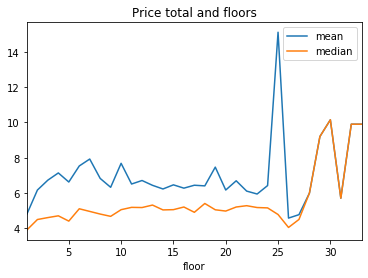

In [53]:
data.pivot_table(index = ['floor'], values = 'last_price', aggfunc = ('mean','median')).plot()
plt.title('Price total and floors')

Относительно влияния категории этажа можно отметить, что явной взаимосвязи со стоимостью квартир нет. Но если исходить из диаграммы рассеяния, то видно, что с увеличением этажа цена в среднем растёт.
Вместе с тем, по диаграммам рассеяния средних и медианных стоимости и цены за кв.м по отношению к этажам можно отметить, что с увеличением этажа - цена за метр растет. Но по общей стоимости - это не так сильно выражено. 
Кроме того, есть явные выбросы для этажей 25 и 30 с очень высокими ценами.

 - **Влияние даты размещения: дня недели, месяца и года**

0.001

0.003

-0.043

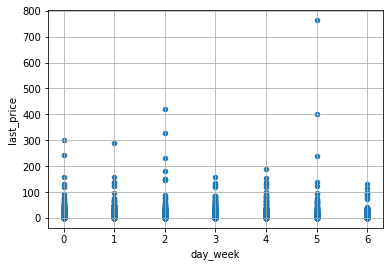

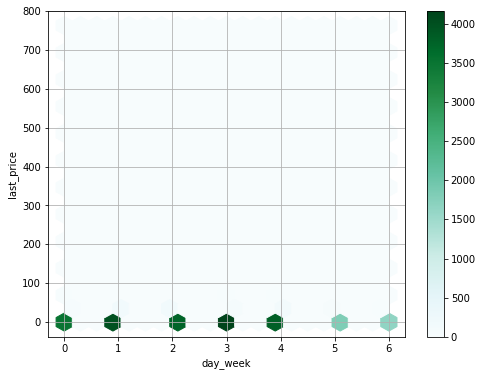

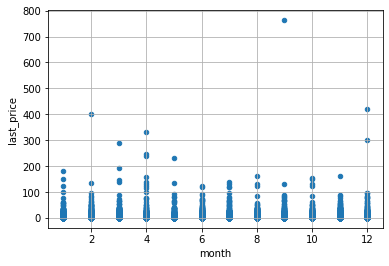

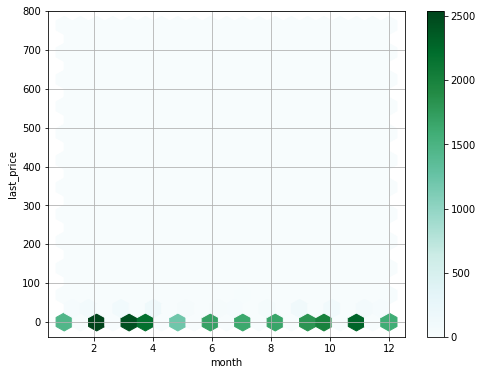

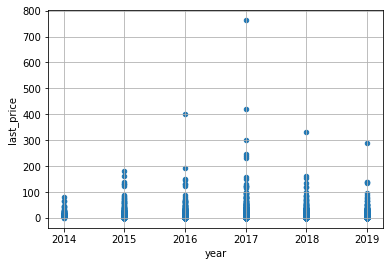

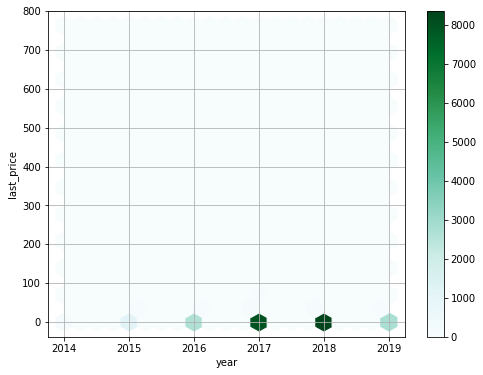

In [54]:
# посмотрим корреляции между этими величинами и построим диаграмму рассеяния
corr_list1 = ['day_week', 'month', 'year']
corr_numbers3 = []
for col in corr_list1:
    display(round(data['last_price'].corr(data[col]), 3))
    corr_numbers3.append(data['last_price'].corr(data[col]))
    data.plot(x = col, y = 'last_price', kind = 'scatter', grid=True)
    data.plot(x=col, y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

Календарные характеристики, как месяц и день недели, не имею явного влияния на цену квартиры. Хотя можно отметить некоторые повышения стоимости с понедельника по среду и в субботу, и с марта по апрель и декабрь. Относительно годов, наибольшую цену за квартиры в 2017 и 2018 гг.
Кроме того, можно отметить более низкое количество новых объявлений в выходные дни. Скорее всего, это связано с тем, что многие объявления публикуются риелторами, которые реже работают в выходные. 

### Анализ объявлений по населённым пунктам

 - 10 населённых пунктов с наибольшим числом объявлений

In [55]:
top10 = pd.Series(data['locality_name'].value_counts().head(10))
top10

Санкт-Петербург      15651
посёлок Мурино         520
посёлок Шушары         439
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

 - средняя цена квадратного метра

In [56]:
data.query('locality_name in @top10.index').pivot_table(
    index = ['locality_name'], values = 'price_metr', aggfunc = 'mean'
).sort_values(by = 'price_metr', ascending = False)

,price_metr
locality_name,
Санкт-Петербург,114.868884
Пушкин,103.125854
деревня Кудрово,92.473712
посёлок Парголово,90.176177
посёлок Мурино,85.673327
посёлок Шушары,78.551595
Колпино,75.424467
Гатчина,68.746287
Всеволожск,68.654447


 - населённые пункты с самой высокой и низкой стоимостью жилья

In [57]:
data.query('last_price == last_price.max()').loc[:, ['locality_name', 'last_price', 'total_area']]

,locality_name,last_price,total_area
12917,Санкт-Петербург,763.0,400.0


In [58]:
data.query('last_price == last_price.min()').loc[:, ['locality_name', 'last_price', 'total_area']]

,locality_name,last_price,total_area
8765,Санкт-Петербург,0.01219,109.0


In [59]:
data.query('price_metr == price_metr.min()').loc[:, ['locality_name', 'last_price', 'total_area', 'price_metr']]

,locality_name,last_price,total_area,price_metr
8765,Санкт-Петербург,0.01219,109.0,0.11


Самая высокая и низкая стоимостью жилья в Санкт-Петербурге и составляет 763 млн. руб. и 12 тыс.руб. соответственно. Возможно в данных по самой низкой стоимости ошибка, так как выглядит не реально. 

### Удаленность от центра для Санкт-Петербурга

In [60]:
# выделите квартиры в Санкт-Петербурге
objects_SP = data.query('locality_name == "Санкт-Петербург"')

In [61]:
# столбец с расстоянием до центра в километрах округлим до целых значений

objects_SP.loc[:, 'city_centers_nearest'] = objects_SP.loc[:, 'city_centers_nearest'].round(0).astype('int')
objects_SP.loc[:, 'city_centers_nearest'].head()


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0    16
2    14
3     7
4     8
7    12
Name: city_centers_nearest, dtype: int64

In [62]:
# посчитаим среднюю цену для каждого километра
objects_SP.pivot_table(
    index = ['city_centers_nearest'], values = 'last_price', aggfunc = 'mean'
).reset_index(drop=False)


,city_centers_nearest,last_price
0,0,31.449116
1,1,21.206721
2,2,17.788320
3,3,11.137395
4,4,13.304280
5,5,14.455996
6,6,15.338418
7,7,14.775153
8,8,9.949111
9,9,6.956583


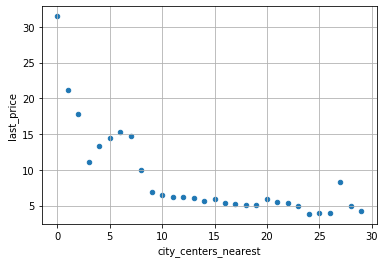

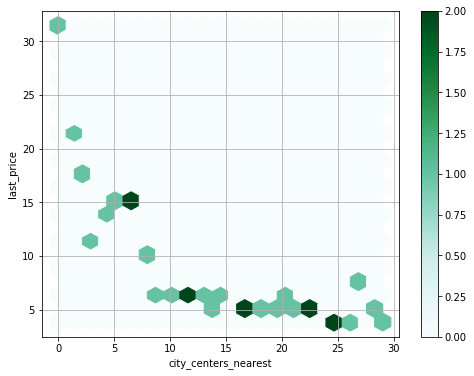

In [63]:
# построим график влияния удалённости от центра на цену

objects_SP.pivot_table(
    index = ['city_centers_nearest'], values = 'last_price', aggfunc = 'mean'
).reset_index(drop=False).plot(x = 'city_centers_nearest', y = 'last_price', kind = 'scatter', grid=True)

objects_SP.pivot_table(
    index = ['city_centers_nearest'], values = 'last_price', aggfunc = 'mean'
).reset_index(drop=False).plot(x = 'city_centers_nearest', y = 'last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

Судя по графику, центральная зона заканчивается на 9 км. При этом параметре происходит резкое изменение стоимости квартир в Санкт-Петербурге. 

### Анализ центра для Санкт-Петербурга

In [64]:
# Выделим сегмент квартир в центре
objects_SP_center = objects_SP.query('city_centers_nearest <= 9')

In [65]:
# Выделим сегмент квартир вне центра
objects_SP_other = objects_SP.query('city_centers_nearest > 9')


count    4703.000000
mean       86.376041
std        56.815809
min        12.000000
25%        51.000000
50%        72.600000
75%       101.950000
max       900.000000
Name: total_area, dtype: float64

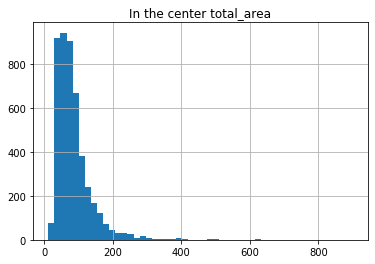

count    10948.000000
mean        55.454738
std         25.740960
min         13.000000
25%         39.300000
50%         49.700000
75%         64.500000
max        470.300000
Name: total_area, dtype: float64

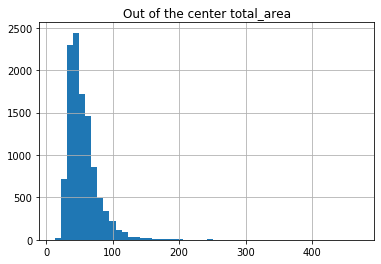

count    4703.000000
mean       13.267576
std        22.267798
min         0.012190
25%         5.950967
50%         8.500000
75%        13.036548
max       763.000000
Name: last_price, dtype: float64

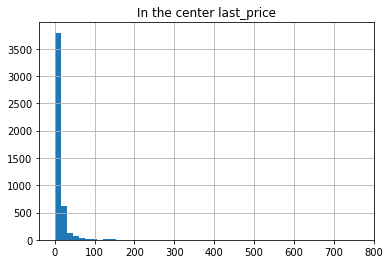

count    10948.000000
mean         5.829948
std          3.653621
min          1.190000
25%          3.950000
50%          4.900000
75%          6.500000
max        130.000000
Name: last_price, dtype: float64

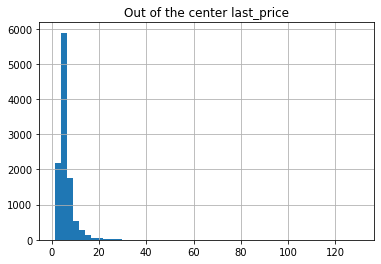

count    4703.000000
mean        2.670848
std         1.394563
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        19.000000
Name: rooms, dtype: float64

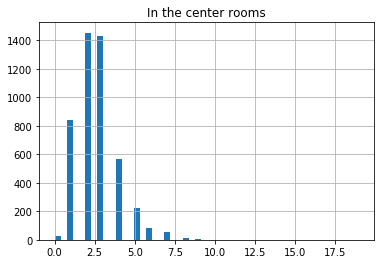

count    10948.000000
mean         1.958257
std          0.947413
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: rooms, dtype: float64

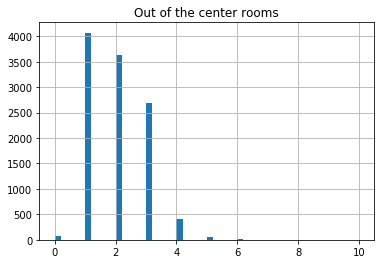

count    4703.000000
mean        2.904267
std         0.298058
min         2.500000
25%         2.722026
50%         2.740000
75%         3.050000
max         4.000000
Name: ceiling_height, dtype: float64

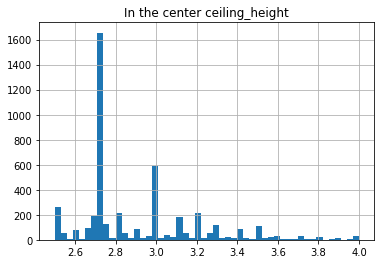

count    10948.000000
mean         2.675996
std          0.130288
min          2.500000
25%          2.570000
50%          2.722026
75%          2.722026
max          4.000000
Name: ceiling_height, dtype: float64

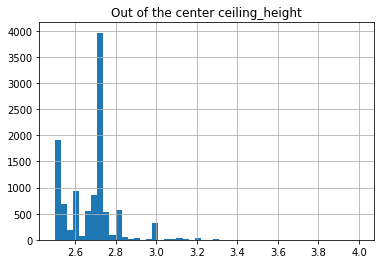

In [66]:
# изучим площадь, цену, число комнат, высоту потолков
col_list_SP = ['total_area', 'last_price', 'rooms', 'ceiling_height']
for col in col_list_SP:
    display(objects_SP_center[col].describe())
    objects_SP_center[col].hist(bins = 50)
    plt.title('In the center '+col)
    plt.show()
    display(objects_SP_other[col].describe())
    objects_SP_other[col].hist(bins = 50)
    plt.title('Out of the center '+col)
    plt.show()

Теперь можно сравнить параметры для объектов в центре Санкт-Петербурга и вне центра. 
Площадь в целом повторят распределение по всему городу, но среднее и медиана смещены в большую сторону в центре. 
Цены в центре тоже выше, чем во всем Санкт-Петербурге.
Относительно количества комнат можно отметить, что в центре в среднем на 1 комнату больше исходя из медианного значения. Кроме того, потолки в центре немного выше, чем в среднем по всему городу. 

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
Центр города обладает некоторыми отличиями касательно цены и роскоши). Если убрать в центре `show`, распределение параметров в центре и вне его будут строиться на одном графике
</div>


,rooms,floor_cat_num,city_centers_nearest,day_week,month,year
в центре,0.350873,0.0961,-0.123773,0.019572,0.001881,-0.052267
вне центре,0.350873,0.0961,-0.123773,0.019572,0.001881,-0.052267


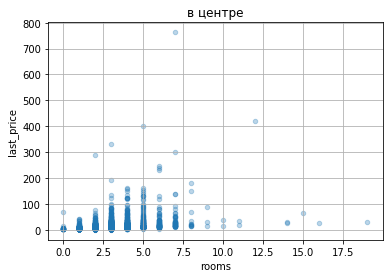

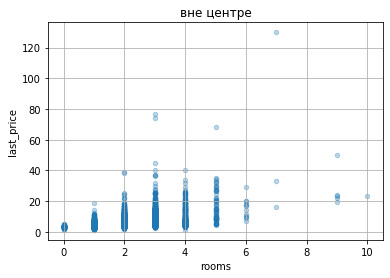

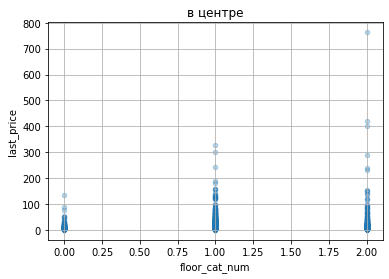

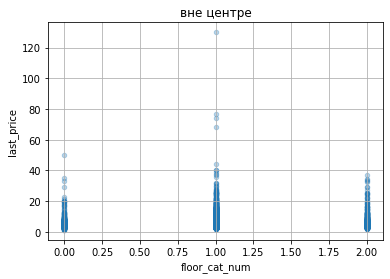

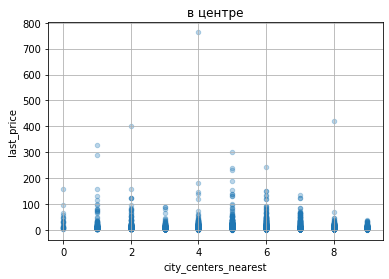

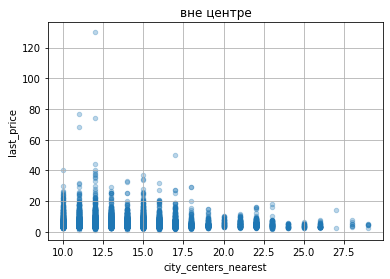

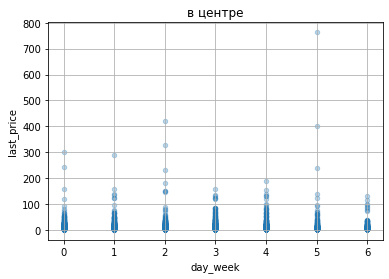

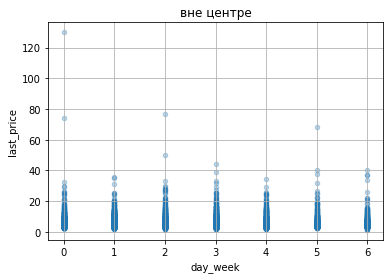

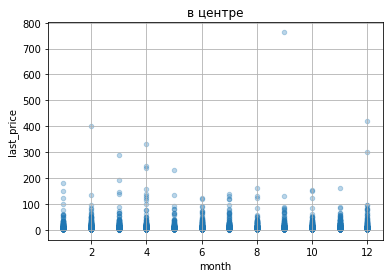

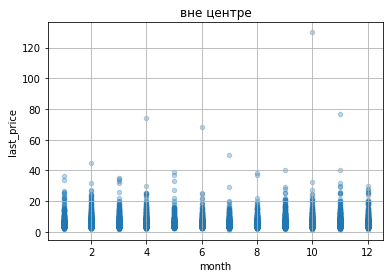

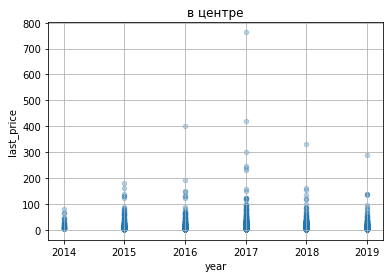

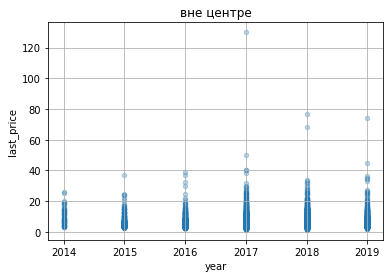

In [67]:
# рассмотрим влияение 
# стоимости квартиры числа комнат, этажа, удалённость от центра, дата размещения объявления 
# в центре и во всем городе
center = [' в центре', ' вне центре']
col_list_SP2 = ['rooms', 'floor_cat_num', 'city_centers_nearest', 'day_week', 'month', 'year']
corr_numbers_in = []
corr_numbers_out = []
for col in col_list_SP2:
    corr_numbers_in.append(objects_SP_center['last_price'].corr(objects_SP_center[col]))
    corr_numbers_out.append(objects_SP_center['last_price'].corr(objects_SP_center[col]))

    objects_SP_center.plot(x = col, y = 'last_price', kind = 'scatter', grid=True, alpha = 0.3, )
    plt.title ('в центре')
    
    objects_SP_other.plot(x = col, y = 'last_price', kind = 'scatter', grid=True, alpha = 0.3)
    plt.title ('вне центре')
    
corr_numbers = [corr_numbers_in, corr_numbers_out]
pd.DataFrame(data= corr_numbers, index=center, columns = col_list_SP2)


Явных корреляций среди рассматриваемых параметров нет. Исходя из точечных диаграмм можно отметить: 
- цена растёт с увеличением комнат, но до 5
- В центре за последние этажи цена выше, вне центра - выше отличные от первого и последнего 
- Удалённость от центра влияет на цену вне центра, тогда как внутри центральной зоны не выявляется зависимость
- Объявления, размещаемые в понедельник, среду и субботу, с ценой чуть выше. Если рассматривать месяца, то для центра более дорогие объявления размещали в первые 5, для другой зоны - нет значительной разницы. Также в 2017 год выставляли более дорогие объекты на продажу. 


## Общий вывод

В данной работе рассмотрены объявления по продаже квартир в Санкт-Петербурге и ближайших населённых пунктах с целью проанализировать факторы, влияющие на стоимость квартир.

Были преобразованы типы данных в целочисленный и единицы исчисления в более привычный формат (км и млн) для повыщения наглядности и читаемости данных. Созданы новые столбцы с ценой квадратного метра, календарными характеристиками и соотношением площадей. 

Для заполнения пропусков использовались средние значения тех же категориях (расстояния до объектов, ), коэффициенты соотношения от зависимых данных (для площадей), нулевые значения (для количества: балконы, парки, аэропорты).
 
В данных наблюдаются аномалии, как например, слишком высокие потолки, частое закрытие объявлений в 30, 45, 60 и 90 дней, а также вероятные ошибки, как например, очень дешевая квартира 12 тыс. руб. 

Для анализа использовались метод describe, гистограммы, диаграммы рассеяния, коэффициенты коррреляции. 

В среднем продают 2-3х комнатные квартиры, площадью около 50-60 кв.м. 
Наибольшее число объявлений размещено для Санкт- Петербурга. Там же были самый дорогой и дешевый объект. 

Повышение цен наблюдалось в 2017 году, а менее активное размещение объявлений в выходные.

По расчетам средней цены квартир в Санкт- Петербурге удалось определить центральную зону, в которой отмечется общее повышение стоимости недвижимости. 

В итоге анализ имеющихся данных позволил сделать вывод, что на цену в той или иной степени влияет площадь, количество комнат, этаж и удалённость от центра. 